# Time series forecasting

## Objective

* Forecast traffic on JetRail for the next 7 months
* Unicorn Investors will only invest if there are more than 1 million monthly users within the next 18 months


## Hypothesis

* Traffic increases over the years. Population has an upward trend with time. Companies expand their business over time leading to more customers
* Traffic will be higher over May to October. Tourist visits increase during this time period
* Weekday traffic is more than weekends / holidays. People travel to work / college during the weekdays leading to higher traffic
* Traffic is higher during peak hours. This is when most people are travelling to work / college

In [1]:
# Core libraries
import pandas as pd 
from pandas import Series
import numpy as np         
from datetime import datetime   
        
# Data visualization
import matplotlib.pyplot as plt 
%matplotlib inline 

# Suppress warnings
import warnings                   
warnings.filterwarnings("ignore")

## Read data

* Data features:
  * ID. Unique number of each observation. Has zero feature importance and is removed
  * Datetime. Date and time of each observation
  * Count. Passenger count at each datetime

In [2]:
train = pd.read_csv("Train_SU63ISt.csv") 
test = pd.read_csv("Test_0qrQsBZ.csv")

In [3]:
# Drop the ID column
train.drop(columns=['ID'], inplace=True)
test.drop(columns=['ID'], inplace=True)

print(f"train dimensions {train.shape}")
print(f"test dimensions {test.shape}")

train dimensions (18288, 2)
test dimensions (5112, 1)


In [4]:
train.head()

,Datetime,Count
0,25-08-2012 00:00,8
1,25-08-2012 01:00,2
2,25-08-2012 02:00,6
3,25-08-2012 03:00,2
4,25-08-2012 04:00,2


In [5]:
test.head()

,Datetime
0,26-09-2014 00:00
1,26-09-2014 01:00
2,26-09-2014 02:00
3,26-09-2014 03:00
4,26-09-2014 04:00


## Feature extraction

* Datetime is a string. Convert to datetime format
* Extract the year, month, day and hour information from Datetime. We need this to check our date-based hypothesis
* Determine whether a date occurred on a weekend or weekday

In [6]:
# Datetime column  is of type 'object' i.e. a string
train.dtypes

Datetime    object
Count        int64
dtype: object

In [7]:
# Datetime column  is of type 'object' i.e. a string
test.dtypes

Datetime    object
dtype: object

In [8]:
# Convert Datetime column for both train and test sets from string to datetime format
train['Datetime'] = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M') 
test['Datetime'] = pd.to_datetime(test.Datetime, format='%d-%m-%Y %H:%M') 

In [9]:
for col in (train, test):
    col['year'] = col.Datetime.dt.year 
    col['month'] = col.Datetime.dt.month 
    col['day'] = col.Datetime.dt.day    
    col['hour'] = col.Datetime.dt.hour
    col['day of week'] = col.Datetime.dt.dayofweek

In [10]:
train.head()

,Datetime,Count,year,month,day,hour,day of week
0,2012-08-25 00:00:00,8,2012,8,25,0,5
1,2012-08-25 01:00:00,2,2012,8,25,1,5
2,2012-08-25 02:00:00,6,2012,8,25,2,5
3,2012-08-25 03:00:00,2,2012,8,25,3,5
4,2012-08-25 04:00:00,2,2012,8,25,4,5


In [11]:
test.head()

,Datetime,year,month,day,hour,day of week
0,2014-09-26 00:00:00,2014,9,26,0,4
1,2014-09-26 01:00:00,2014,9,26,1,4
2,2014-09-26 02:00:00,2014,9,26,2,4
3,2014-09-26 03:00:00,2014,9,26,3,4
4,2014-09-26 04:00:00,2014,9,26,4,4


In [12]:
# Convert Datetime to a weekday number, Saturday (5) Sunday (6)
train['weekend'] = train['Datetime'].dt.weekday >= 5

# Output is boolean (True, False). Convert to integer (1, 0)
train['weekend'] = train['weekend'].astype(int)

## Plot time series

In [13]:
# X-axis is Datetime
train.set_index('Datetime')

,Count,year,month,day,hour,day of week,weekend
Datetime,,,,,,,
2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,2,2012,8,25,4,5,1
...,...,...,...,...,...,...,...
2014-09-25 19:00:00,868,2014,9,25,19,3,0
2014-09-25 20:00:00,732,2014,9,25,20,3,0
2014-09-25 21:00:00,702,2014,9,25,21,3,0


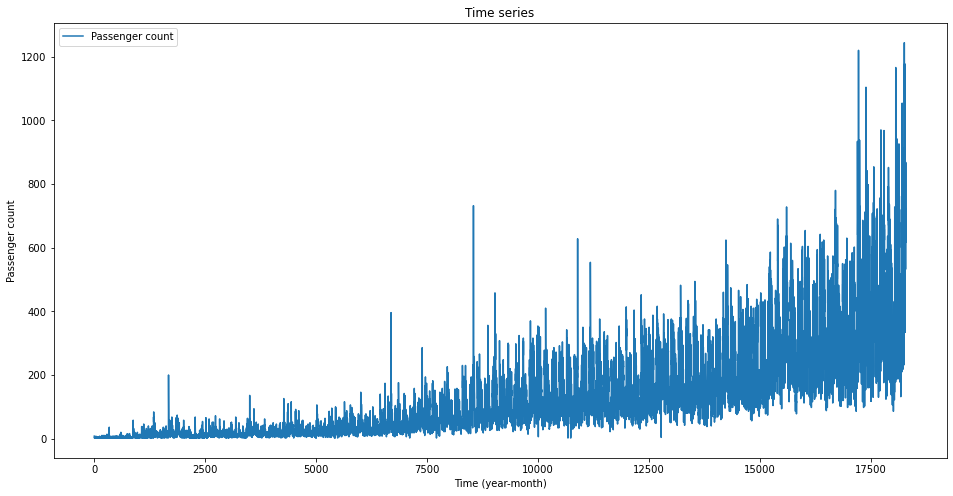

In [14]:
# Display time series
plt.figure(figsize=(16, 8))
plt.plot(train['Count'], label="Passenger count")
plt.title("Time series")
plt.xlabel("Time (year-month)")
plt.ylabel("Passenger count")
plt.legend(loc='best')
plt.show()

## Exploratory Data Analysis

### Hypothesis #1 

* Traffic increases over the years. Population has an upward trend with time. Companies expand their business over time leading to more customers
* We see an exponential growth in traffic
* Data supports our hypothesis

<AxesSubplot:xlabel='year'>

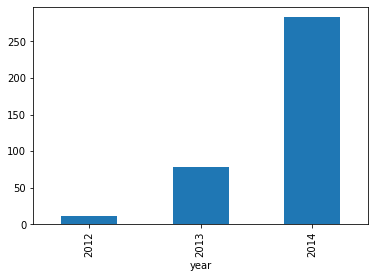

In [15]:
# Mean traffic by year
train.groupby('year')['Count'].mean().plot.bar()

### Hypothesis #2

* Traffic will be higher over May to October. Tourist visits increase during this time period
* The "Mean traffic by month" graph doesn't support our hypothesis
  * May to August shows growth in the mean traffic
  * September shows a decline in traffic
  * October, November and December are significantly lower than other months
* The "Mean traffic by year and month" graph shows that
  * Traffic levels in 2014 were significantly lower than the other years
  * 2012 has data for months 8 to 12 only
  * There is significant growth in traffic in 2013 and 2014
  * 2014 is missing data for months 10, 11, and 12
* Mean traffic appears to grow exponentially

<AxesSubplot:title={'center':'Mean traffic by month'}, xlabel='month'>

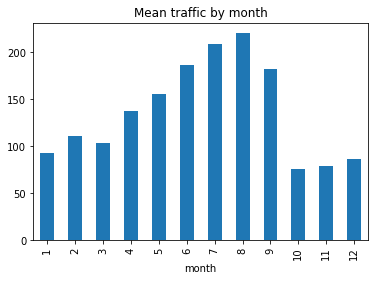

In [16]:
# Mean traffic by month
train.groupby('month')['Count'].mean().plot.bar(title='Mean traffic by month')

<AxesSubplot:title={'center':'Mean traffic by year and month'}, xlabel='year,month'>

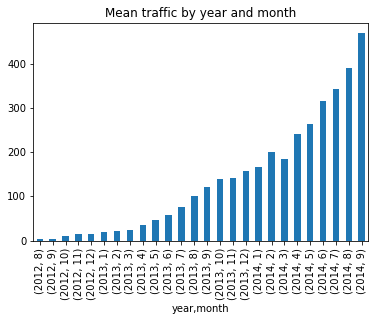

In [17]:
# Mean traffic by year and month
train.groupby(['year', 'month'])['Count'].mean().plot.bar(title='Mean traffic by year and month')

### Hypothesis #3

* Weekday traffic is more than weekends / holidays. People travel to work / college during the weekdays leading to higher traffic
* The "Mean traffic on weekdays (0) vs weekends (1)" graph shows that mean traffic on weekdays is greater than weekends
* The "Mean traffic by day of the week" shows the mean traffic by each day
  * 0 to 4 are Monday to Friday
  * 5 and 6 are Saturday and Sunday
  * There is a decrease of mean traffic over the weekend

<AxesSubplot:title={'center':'Mean traffic on weekdays (0) vs weekends (1)'}, xlabel='weekend'>

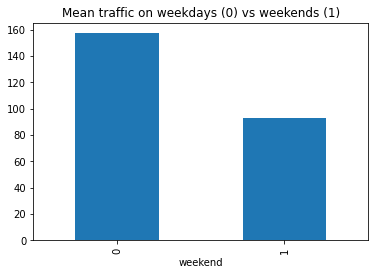

In [18]:
# Mean traffic on weekends vs weekdays
train.groupby('weekend')['Count'].mean().plot.bar(title='Mean traffic on weekdays (0) vs weekends (1)')

<AxesSubplot:title={'center':'Mean traffic by day of the week'}, xlabel='day of week'>

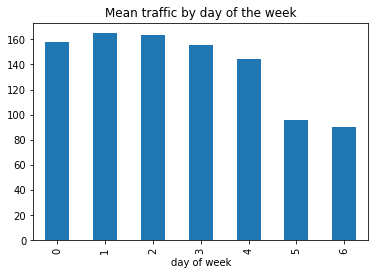

In [19]:
# Mean traffic by day of the week
train.groupby('day of week')['Count'].mean().plot.bar(title='Mean traffic by day of the week')

### Hypothesis #4

* Traffic is higher during peak hours. This is when most people are travelling to work / college
* The "Mean traffic by hour of the day" graph supports our hypothesis
  * Mean traffic is lowest in the early hours 
  * Mean traffic peaks at 7pm

<AxesSubplot:title={'center':'Mean traffic by hour of the day'}, xlabel='hour'>

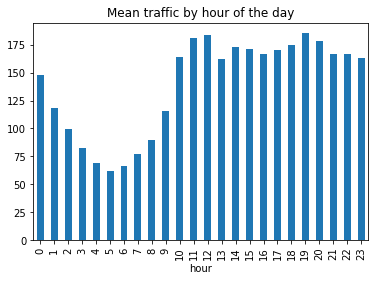

In [20]:
# Mean traffic by hour of the day
train.groupby('hour')['Count'].mean().plot.bar(title='Mean traffic by hour of the day')